In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import datetime as dt
from scipy.stats import linregress
import matplotlib.pyplot as plt


# Import API key
from config import weather_api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lng = []
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

In [4]:
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: cabo san lucas
City processed: ambon
City processed: watsa
City processed: barrow
City processed: bluff
City NOT found: marcona
City processed: ushuaia
City processed: kapaa
City processed: saint-augustin
City processed: ribeira grande
City processed: kahului
City processed: hermanus
City processed: rock springs
City processed: rikitea
City processed: krasnogorsk
City processed: mahebourg
City processed: imbituba
City processed: lompoc
City processed: albany
City processed: rudnichnyy
City processed: vilhena
City processed: khatanga
City processed: cape town
City processed: east london
City processed: makungu
City NOT found: cheyur
City processed: walvis bay
City processed: blagoyevo
City processed: chuy
City processed: ponta do sol
City processed: mercedes
City processed: hithadhoo
City processed: cherskiy
City processed: hobart
City NOT found: belushya guba
City processed: port hedland
City processed: yellowknife
City processed: sorland
City processed: isangel
City pr

City processed: lagoa
City processed: weligama
City processed: petropavlovsk-kamchatskiy
City processed: paris
City processed: ambilobe
City processed: bintulu
City processed: katima mulilo
City processed: nouakchott
City processed: hilo
City processed: hambantota
City processed: goundam
City processed: winnemucca
City processed: ancud
City processed: krasnyy yar
City processed: ucluelet
City processed: manokwari
City processed: grand gaube
City processed: kavaratti
City processed: oktyabrskoye
City processed: furstenfeld
City processed: garowe
City processed: texarkana
City processed: port macquarie
City processed: esperance
City processed: belyy yar
City processed: ambulu
City processed: odweyne
City processed: juneau
City processed: xai-xai
City NOT found: zlatoustovsk
City processed: maba
City processed: liverpool
City processed: kozhevnikovo
City processed: palafrugell
City processed: saint-marc
City processed: vagur
City processed: acajutla
City processed: piacabucu
City processe

In [5]:
#build a data frame's titles
city_data = {
    "City": city_name,
    "Country":country,
    "Date":date, 
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness, 
    "Wind Speed":wind_speed
}
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,cabo san lucas,MX,1635214359,22.8909,-109.9124,81.05,71,1,5.01
1,ambon,ID,1635214359,-3.6954,128.1814,87.94,74,40,4.61
2,watsa,CD,1635214359,3.0372,29.5355,64.89,94,94,1.86
3,barrow,US,1635214359,71.2906,-156.7887,24.82,86,90,14.97
4,bluff,NZ,1635214360,-46.6000,168.3333,53.94,87,99,11.18
5,ushuaia,AR,1635214231,-54.8000,-68.3000,33.46,93,40,11.50
6,kapaa,US,1635214360,22.0752,-159.3190,84.18,82,90,4.00
7,saint-augustin,CA,1635214360,51.2260,-58.6502,37.44,71,49,8.48
8,ribeira grande,PT,1635214361,38.5167,-28.7000,68.99,75,24,21.09
9,kahului,US,1635214361,20.8947,-156.4700,82.42,72,20,23.02


In [6]:
# Save data frame to CSV
city_data_df.to_csv('Output_data/city_data.csv')

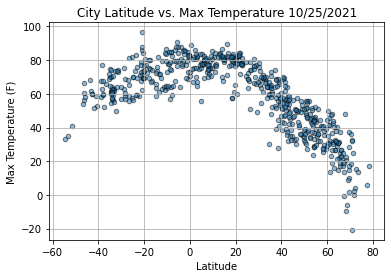

In [7]:
#add today's date in to charts
date = dt.date.today().strftime("%m/%d/%Y")

plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o",s=20,alpha=.5, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_data/City Latitude vs Max Temperature.png")
plt.show()

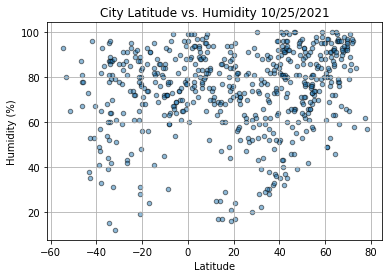

In [8]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", s=20,alpha=.5, edgecolors="k")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_data/City Latitude vs Humidity.png")
plt.show()

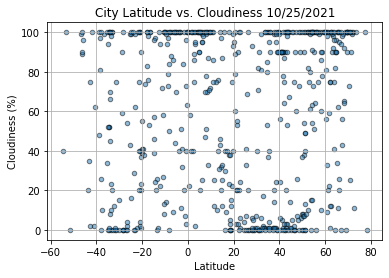

In [9]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", s=20,alpha=.5, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_data/City Latitude vs Cloudiness.png")
plt.show()

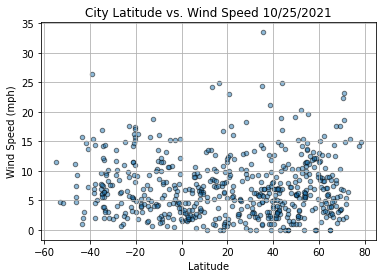

In [10]:

plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", s=20,alpha=.5, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_data/City Latitude vs Wind Speed.png")
plt.show()

In [11]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

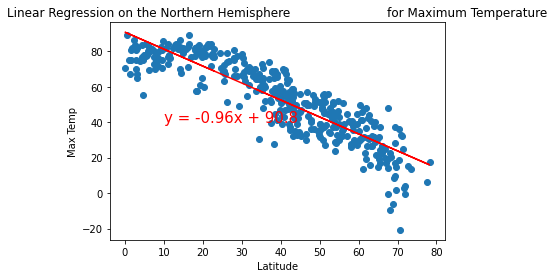

In [13]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

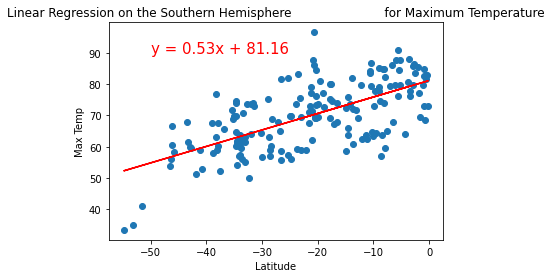

In [14]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

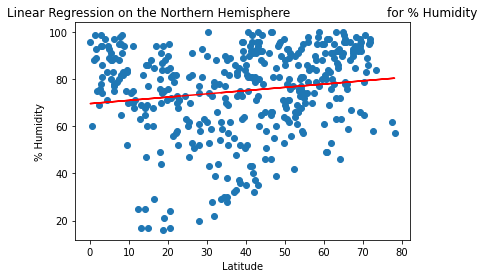

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

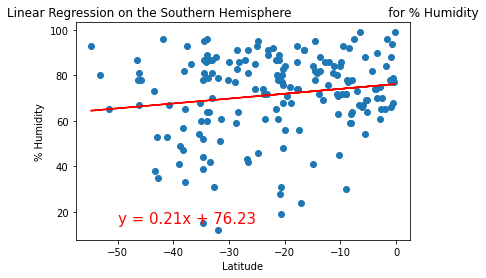

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

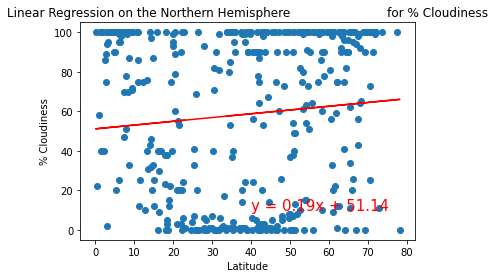

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

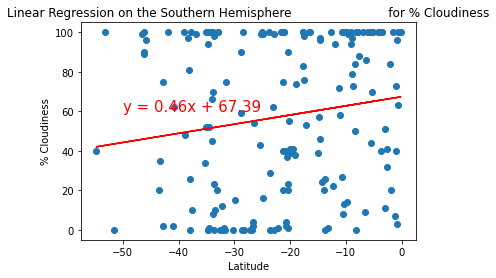

In [18]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

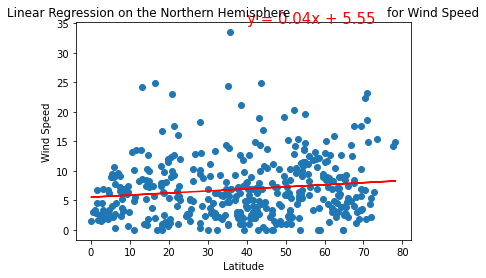

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

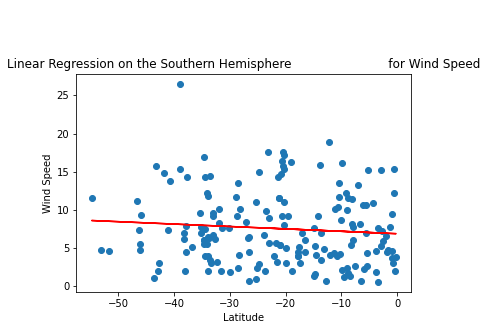

In [20]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [21]:
gmaps.configure(api_key=g_key)

# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer) 
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)


In [ ]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

In [ ]:
len(hotels["results"])

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
 # Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

In [ ]:
hotel_df


In [ ]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [ ]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [ ]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig